# Linear Regression


Straight-line fit to data:  $ y = ax + b $

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

In [2]:
# Tests to see if we are running in the Google Colaboratory environment
# If so, use an https URL to access the data.  Otherwise, load via the file path
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/DataScienceNotebooks/master/ModelingPart1/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

In [3]:
data = pd.read_csv(data_file_prefix+"data/advertising.csv", index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
data.shape

(200, 4)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


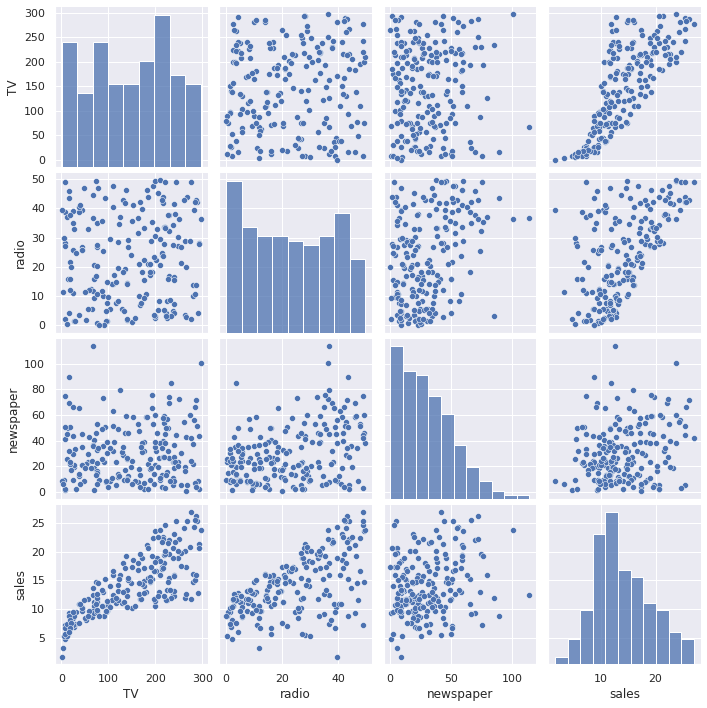

In [6]:
sns.pairplot(data)

<AxesSubplot:xlabel='TV', ylabel='sales'>

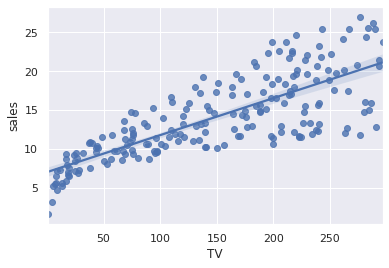

In [7]:
sns.regplot(data=data, x="TV", y="sales")

<AxesSubplot:xlabel='radio', ylabel='sales'>

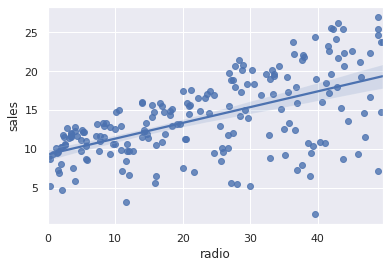

In [8]:
sns.regplot(data=data, x="radio", y="sales")

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

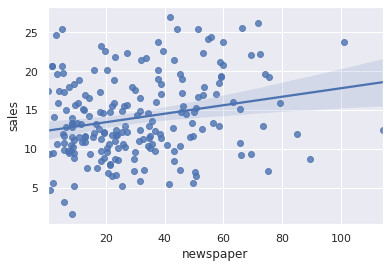

In [9]:
sns.regplot(data=data, x="newspaper", y="sales")

## Simple Linear Regression
Approach to predict a quantitative response using a single feature

$y = \beta_0 + \beta_1x$

$y$ is the response<br>
$x$ is the feature<br>
$\beta_0$ is the intercept<br>
$\beta_1$ is the coefficient for $x$<br>
$\beta_0$ and $\beta_1x$ are called the *model coefficients*

Estimated using least squares.

In [10]:
## statsmodel ##
import statsmodels.formula.api as smf

lm1 = smf.ols(formula='sales ~ TV', data=data).fit()
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [11]:
from sklearn.linear_model import LinearRegression

X = data[['TV']]
y = data.sales

model = LinearRegression(fit_intercept=True)
model.fit(X, y)

print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     0.04753664043301975
Model intercept: 7.032593549127695


In [12]:
model.predict(np.array([1,2,10,20,50,100]).reshape(-1, 1))

array([ 7.08013019,  7.12766683,  7.50795995,  7.98332636,  9.40942557,
       11.78625759])

## Multple Linear Regression
$ y = a_0 + a_1x_1 + a_2x_2 + ... + a_nx_n $

In [13]:
# "4-Dimensional example"
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000051
[ 1.5 -2.   1. ]


## Polynomial Regression

For example, if $f_n(x) = x^n$, our model becomes a polynomial regression: $$
y = a_0 + a_1 x + a_2 x^2 + a_3 x^3 + \cdots
$$

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                           LinearRegression())

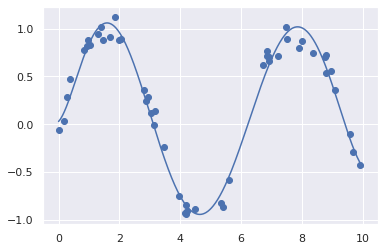

In [15]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

# Regularazition

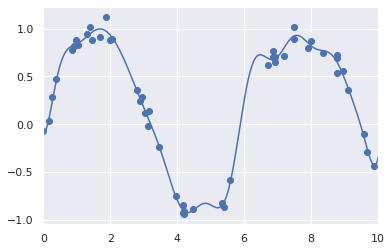

In [16]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(20),
                            LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

Rather than being a sum of polynomial bases, we have a sum of Gaussian bases.

Using basis functions greatly extends the flexibility of linear regression, but can also lead to over fitting.

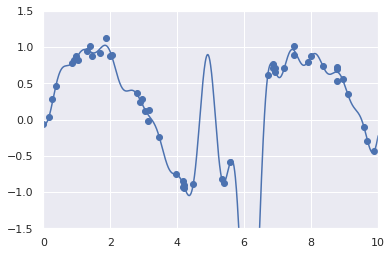

In [17]:
model = make_pipeline(GaussianFeatures(30),
                      LinearRegression())
model.fit(x[:, np.newaxis], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

# 30 instead of 20!

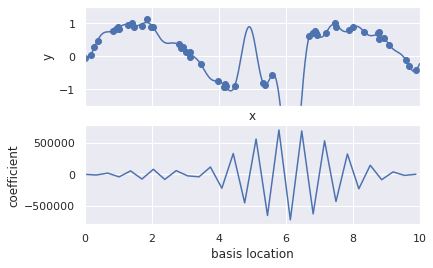

In [18]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))
    
    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_,
               model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location',
              ylabel='coefficient',
              xlim=(0, 10))
    
model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

## Ridge regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as ridge regression or $L_2$ regularization, sometimes also called Tikhonov regularization. This proceeds by penalizing the sum of squares (2-norms) of the model coefficients; in this case, the penalty on the model fit would be $$
P = \alpha\sum_{n=1}^N \theta_n^2
$$ where $\alpha$ is a free parameter that controls the strength of the penalty. This type of penalized model is built into Scikit-Learn with the Ridge estimator:

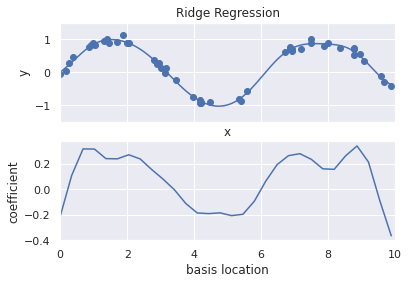

In [19]:

from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

## Lasso regression ($L_1$ regularization)
Another very common type of regularization is known as lasso, and involves penalizing the sum of absolute values (1-norms) of regression coefficients: $$
P = \alpha\sum_{n=1}^N |\theta_n|
$$ 
Conceptually very similar to ridge regression, the results can differ surprisingly

Due to geometric reasons lasso regression tends to favor sparse models where possible: that is, it preferentially sets model coefficients to exactly zero.

/home/jbslanka/mypython/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0021358158704841146, tolerance: 0.002065280097246271
  model = cd_fast.enet_coordinate_descent(


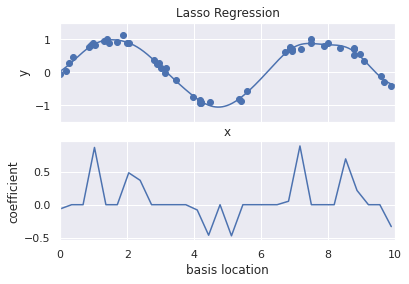

In [20]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.001))
basis_plot(model, title='Lasso Regression')

## Review questions and exercises

* What do the slope coefficients mean in the linear regression model?
* Why is linear regression susceptible to outliers?
* How can you test if a particular feature / independent variable is significant?
* What is the advantage of Lasso over Ridge?